/tmp/ipykernel_71/970805987.py:28: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  L_x_mu = (mu**x * np.exp(-mu)) / np.vectorize(np.math.factorial)(x)
/tmp/ipykernel_71/970805987.py:29: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  L_mu_mu = (mu**mu * np.exp(-mu)) / np.math.factorial(mu)
/tmp/ipykernel_71/970805987.py:30: RuntimeWarning: invalid value encountered in log
  likelihood_ratio = -2 * np.log(L_x_mu / L_mu_mu)


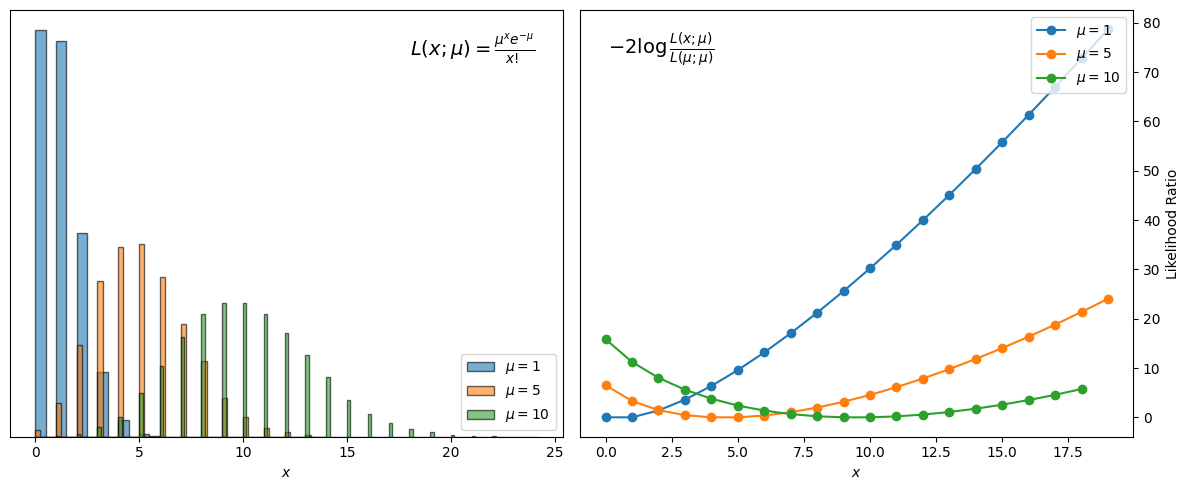

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 1]})

# Histogram
for i, mu in enumerate((1, 5, 10)):
    res = np.random.poisson(mu, size=(10000))
    bin_width = 0.5 / (i + 1)
    bins = np.arange(res.min(), res.max() + bin_width, bin_width)
    ax[0].hist(res, bins=bins, alpha=0.6, label=fr'$\mu={mu}$', edgecolor='black')

# Remove y-axis from histogram
ax[0].set_yticks([])
ax[0].set_ylabel('')
ax[0].set_xlabel(r'$x$')
ax[0].legend()

# Add Poisson equation in LaTeX
poisson_eq = r"$L(x; \mu) = \frac{\mu^x e^{-\mu}}{x!}$"
ax[0].text(0.95, 0.95, poisson_eq, transform=ax[0].transAxes, fontsize=14,
           verticalalignment='top', horizontalalignment='right')

# Likelihood ratio plot
x = np.arange(0, 20, 1)  # Use only integer values for Poisson likelihood

for mu in (1, 5, 10):
    L_x_mu = (mu**x * np.exp(-mu)) / np.vectorize(np.math.factorial)(x)
    L_mu_mu = (mu**mu * np.exp(-mu)) / np.math.factorial(mu)
    likelihood_ratio = -2 * np.log(L_x_mu / L_mu_mu)
    ax[1].plot(x, likelihood_ratio, label=fr'$\mu={mu}$', marker='o')

# Add likelihood ratio equation in LaTeX
likelihood_ratio_eq = r"$-2 \log \frac{L(x; \mu)}{L(\mu; \mu)}$"
ax[1].text(0.05, 0.95, likelihood_ratio_eq, transform=ax[1].transAxes, fontsize=14,
           verticalalignment='top', horizontalalignment='left')

ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel('Likelihood Ratio')
ax[1].legend(loc='upper right')

# Align y-axis on the right side for the likelihood plot
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

plt.tight_layout()
plt.show()
